<a href="https://colab.research.google.com/github/mistryvivek/YRKCS-PRBX/blob/main/Lit_Review_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most of these libraries will be needed throughout the project - fastf1 does not come with Collab by default

In [1]:
%pip install fastf1
import fastf1 as f1
import pandas as pd
import matplotlib as plot

Common times to pit - inc. latest pit window with biggest gap

- Min, Max, Mode. Median, SD for all pit decisions.
- Compare this againist positions lost or gained AND points scored.

2022 and 2023

In [2]:
# Get all races for one season
# N.B. All events schedules include pre-season testing.
# If we can't get a session, e.g. sprint for a weekend, it must not have had one that weekend.
def getAllSessionsforYear(year, eventType):
  eventCal = f1.get_event_schedule(year)
  eventData = []
  for i in range(eventCal.shape[0] - 1):
    try:
      eventData.append(f1.get_session(year, i, eventType))
    except:
      print(f"Event {i}, {year} has no {eventType}")
  return eventData

In [3]:
eventsR2022 = getAllSessionsforYear(2022, 'R')
eventsR2023 = getAllSessionsforYear(2023, 'R')

req         WARNING 	DEFAULT CACHE ENABLED! (212.28 MB) /root/.cache/fastf1


Event 0, 2022 has no R
Event 0, 2023 has no R


***Some testing to explore the new api and creating my own dataframe.***

In [4]:
eventsR2022[0].load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.2]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.2]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

In [5]:
testDf = eventsR2022[0].laps
testDf.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [6]:
testPitIn = testDf[~testDf['PitInTime'].isnull()]
lapsCompletedVsPositionDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

maxLaps = testDf['LapNumber'].max()

for index, row in testPitIn.iterrows():
  # Race completion (over laps)
  # Whether they had a position change
  race_completed = row['LapNumber'] / maxLaps * 100
  position_lost = row['Position'] > testDf[
        (testDf['LapNumber'] == row['LapNumber'] - 1) &
        (testDf['Driver'] == row['Driver'])]['Position'].iloc[0]

  new_row = {
        "Race Completed": race_completed,
        "Positions Lost": position_lost,
        "Position Before Pit": row['Position']
    }

  # Append the new row to the DataFrame
  lapsCompletedVsPositionDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)

<ipython-input-6-d6e6bd1a9f98>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lapsCompletedVsPositionDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)


In [7]:
lapsCompletedVsPositionDf

,Positions Lost,Race Completed,Position Before Pit
0,False,24.561404,2.0
1,False,52.631579,2.0
2,False,75.438596,2.0
3,True,94.736842,13.0
4,False,24.561404,7.0
5,False,56.140351,8.0
6,False,26.315789,2.0
7,False,57.894737,2.0
8,False,75.438596,4.0
9,True,19.298246,11.0


***Use that to create a new scatterplots***

In [8]:
# Create a fn which can takes each race and add more relevent pit stops information into the same df.
def getPitStopsDf(races):
  # Store all pit stop info.
  pitstopDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

  for race in races:
    race.load()

    # If they have not got into pits, stop has not taken place.
    race_laps_with_pit_stop = race.laps[~race.laps['PitInTime'].isnull()]

    for index, row in race_laps_with_pit_stop.iterrows():
      # Race completion (over laps)
      # Whether they had a position change
      race_completed = row['LapNumber'] / maxLaps * 100
      position_lost = row['Position'] > race.laps[
            (race.laps['LapNumber'] == row['LapNumber'] - 1) &
            (race.laps['Driver'] == row['Driver'])]['Position'].iloc[0]

      new_row = {
            "Race Completed": race_completed,
            "Positions Lost": position_lost,
            "Position Before Pit": row['Position']
        }

      # Append the new row to the DataFrame
      pitstopDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)

    return pitstopDf

In [9]:
pitStop22 = getPitStopsDf(eventsR2022)
pitStop23 = getPitStopsDf(eventsR2023)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.2]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.2]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

In [14]:
pitStop22

,Positions Lost,Race Completed,Position Before Pit
0,False,24.561404,2.0
1,False,52.631579,2.0
2,False,75.438596,2.0
3,True,94.736842,13.0
4,False,24.561404,7.0
5,False,56.140351,8.0
6,False,26.315789,2.0
7,False,57.894737,2.0
8,False,75.438596,4.0
9,True,19.298246,11.0


In [11]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

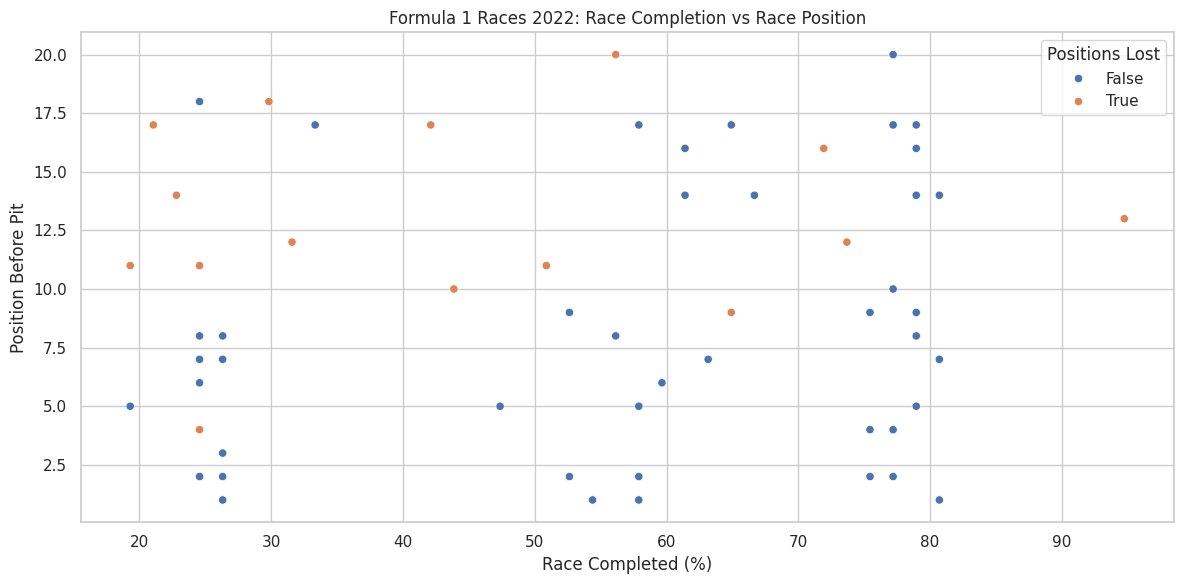

In [12]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitStop22, color="blue")
plt.title("Formula 1 Races 2022: Race Completion vs Race Position")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

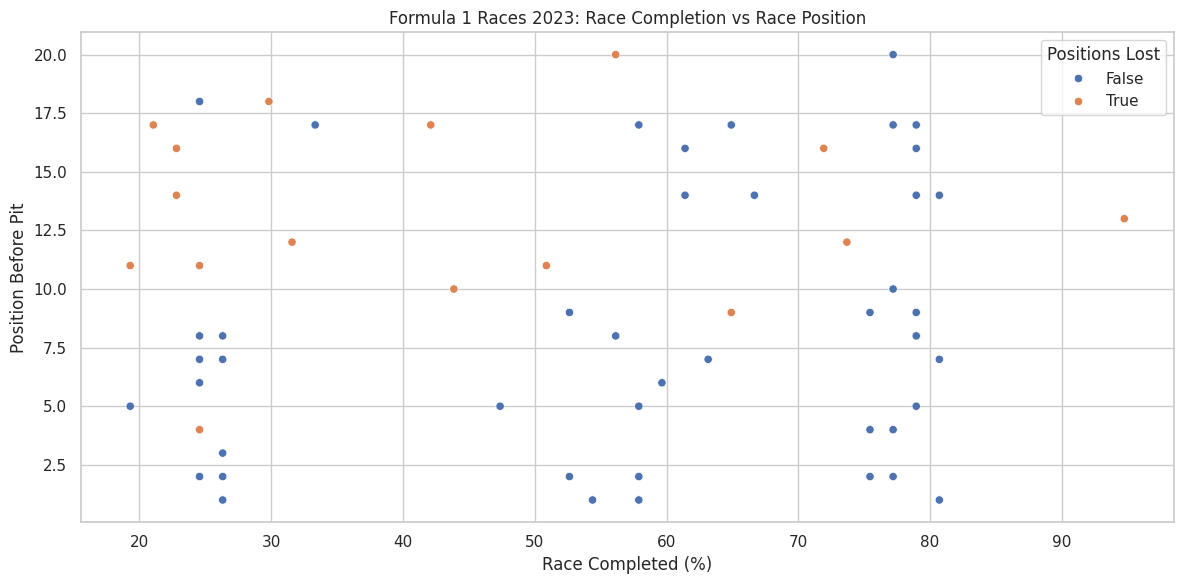

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitStop23, color="blue")
plt.title("Formula 1 Races 2023: Race Completion vs Race Position")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()